In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot,residuals_plot
#https://anaconda.org/DistrictDataLabs/yellowbrick
from yellowbrick.datasets import load_concrete
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels

We are choosing a dataset from Kaggle that will show some residuals and does not have clear linear relationship

In [356]:
import random

In [357]:
from scipy.stats import norm
x =norm.rvs(200,50,size=1000)


In [589]:
y= (np.random.randint(900,size=1000))*(2/(x/10))+(x*1.2)

<h2> Linear Regression from Scratch

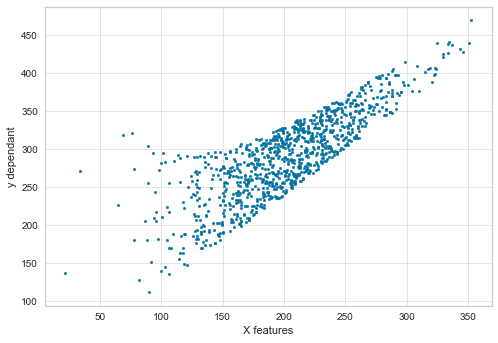

In [731]:
plt.scatter(x,y, alpha= 1, s=7)
plt.xlabel('X features')
plt.ylabel('y dependant')
plt.grid(alpha=0.5)
plt.show()


In [415]:
#lets say linear regress line is  y = m x + c

# m is intercept

#then y_pred = m * x
# calcaulating the y_out we will mutiply the original X values by the slope to produce y_out values for each X

#we initiate C =0
c = 0

# we will calculate y_ pred  mx + c for each value of M ( intecept)
def mult_matrix(x,m,c):
    y_pred = []
    for i in range(len(x)):
        y_pred.append(x[i]*m + c)
    return y_pred


In [423]:
c=0
m=1
y_m1 = mult_matrix(x,m,c)

In [424]:
x.shape

(1000,)

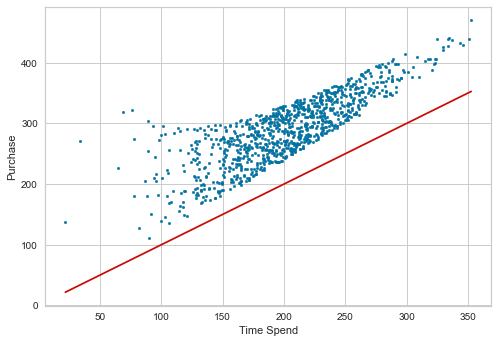

In [724]:
plt.scatter(x,y ,alpha=1,s=7)
plt.plot( [ min(x), max(x) ], [ min(y_m1) , max(y_m1)], color = 'r')
plt.xlabel('Time Spend')
plt.ylabel('Purchase')
plt.show()

In [433]:
#MSE from scratch

def mse(real_target, predicted):
    sum_of_error =0
    
    #loop over all values
    
    for i in range(len(real_target)):
        SSE = (real_target[i]- predicted[i])**2
        sum_of_error = sum_of_error + SSE
    
    mean_squared_error = sum_of_error / float(len(real_target))
    return(mean_squared_error)

In [434]:
y = y.reshape(-1,1)

In [435]:
y.shape

(1000, 1)

In [201]:
y_m1

[array([  9.54 ,   0.   ,  77.317, ...,  14.44 ,   0.   , 109.325])]

In [202]:
y_m1= y_m1[0]

In [204]:
mse_m1= mse(y,y_m1)
mse_m1[0]

2392487.264495242

In [205]:
y.mean()

592.4373709497207

In [222]:
max(y_pred[0])

34327.699

intercept 1


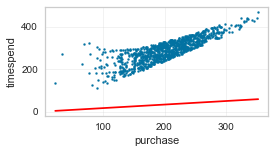

intercept 2


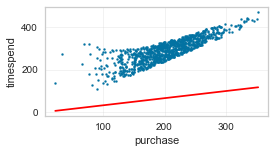

intercept 3


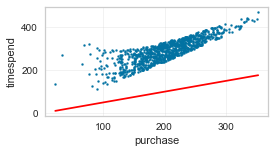

intercept 4


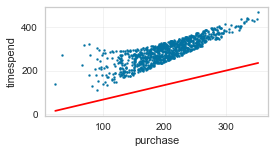

intercept 5


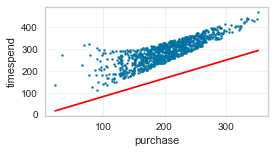

intercept 6


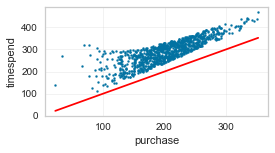

intercept 7


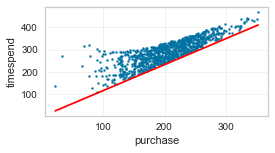

intercept 8


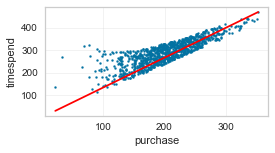

intercept 9


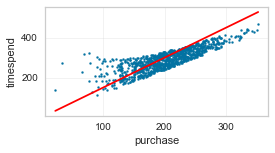

In [725]:
mse_values = []

m= range(1,10) 
#we checked with this Data the m is rather low between .1 to.9

for i in m:
    print('intercept',i)
    
    #calculate Y_pred
    y_pred = mult_matrix(x,i/6,c)
    #calculate MSE and add it to MSE list
    mse_values.append(mse(y,y_pred))
    
    
    plt.figure(figsize=(4,2))
    plt.scatter(x, y,label='Scatter Plot', alpha=1, s =4) 
    plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='red',label='regression line')
    plt.xlabel('purchase')
    plt.ylabel('timespend')
    plt.grid(alpha=0.25)
    
    plt.show()
    
    
    




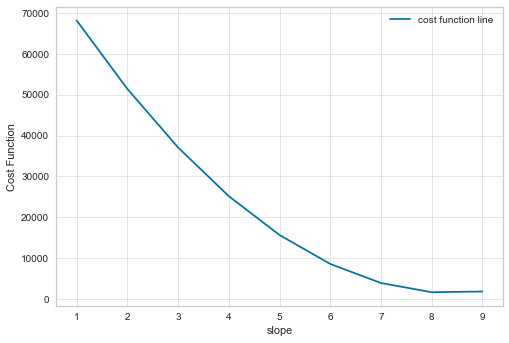

In [444]:
plt.plot(m,mse_values, label='cost function line')
plt.xlabel('slope')
plt.ylabel('Cost Function')
plt.grid(alpha=0.5)
plt.legend()

In [445]:
y.mean()

290.1572159889335

In [446]:
min(mse_values)

1727.9695208594728

In [257]:
#this is rather bad model but we want to see the residual plot

In [448]:
import matplotlib.pyplot as plt

In [451]:
x.shape,y.shape

((1000,), (1000,))

In [624]:
def Simple_Gradient_Descent(x,y,epochs,learning_rate,n):
    
    # to plot
    cost_list=[]
    intercept =[]
    coefficient =[]
    
    # to calculate
    
    m_current=0
    c_current=0
    
    
    
    for i in range(epochs):
        
        y_pred = (m_current * x) + c_current  # mx + c
        
        cost = 1/n * sum ([value**2 for value in (y-y_pred)]) #MSE loss function
        
        #derivatives of m and c
        
        md = -2/n * sum(x*(y - y_pred))  # -2/n * sum ( x * ( y - y_pred) )
        cd = -2/n *sum( y - y_pred)  # -2/n * sum ( y - y_pred) 
        
        m_current = m_current - (learning_rate * md)  # step_size = learning_rate * md 
        c_current = c_current - (learning_rate * md)  # step_size = learning_rate * cd
        
        print('>epoch=%d, m=%.1f,c=%.1f, md=%.1f,cd=%.1f,step_size_m=%.1f,step_size_c=%.1f,cost=%.1f' % 
        (i,m_current,c_current, md,cd,md*learning_rate,cd*learning_rate,(cost)))
        print("           ")
        
        cost_list.append(cost)
        intercept.append(m_current)
        coefficient.append(c_current)
    
    return cost_list,intercept,coefficient
    
    

In [637]:
y.mean()

290.95548991193243

In [468]:
# there is no linear relationship so cost fnction is going very high

In [650]:
#TO PLOT 

#Non Linear data
epochs = 300
n = len(x)
learning_rate = 0.000001
cost_val, intercept,coefficient, = Simple_Gradient_Descent(x,y,epochs,learning_rate,n)

>epoch=0, m=0.1,c=0.1, md=-122334.6,cd=-581.9,step_size_m=-0.1,step_size_c=-0.0,cost=87687.5
           
>epoch=1, m=0.2,c=0.2, md=-111654.7,cd=-532.1,step_size_m=-0.1,step_size_c=-0.0,cost=73306.9
           
>epoch=2, m=0.3,c=0.3, md=-101907.1,cd=-486.7,step_size_m=-0.1,step_size_c=-0.0,cost=61327.4
           
>epoch=3, m=0.4,c=0.4, md=-93010.5,cd=-445.3,step_size_m=-0.1,step_size_c=-0.0,cost=51348.2
           
>epoch=4, m=0.5,c=0.5, md=-84890.6,cd=-407.4,step_size_m=-0.1,step_size_c=-0.0,cost=43035.2
           
>epoch=5, m=0.6,c=0.6, md=-77479.6,cd=-372.9,step_size_m=-0.1,step_size_c=-0.0,cost=36110.2
           
>epoch=6, m=0.7,c=0.7, md=-70715.5,cd=-341.4,step_size_m=-0.1,step_size_c=-0.0,cost=30341.5
           
>epoch=7, m=0.7,c=0.7, md=-64542.0,cd=-312.6,step_size_m=-0.1,step_size_c=-0.0,cost=25536.0
           
>epoch=8, m=0.8,c=0.8, md=-58907.4,cd=-286.4,step_size_m=-0.1,step_size_c=-0.0,cost=21532.8
           
>epoch=9, m=0.8,c=0.8, md=-53764.7,cd=-262.4,step_size_m=-0.1

>epoch=80, m=1.4,c=1.4, md=-82.0,cd=-12.3,step_size_m=-0.0,step_size_c=-0.0,cost=1558.0
           
>epoch=81, m=1.4,c=1.4, md=-74.8,cd=-12.2,step_size_m=-0.0,step_size_c=-0.0,cost=1558.0
           
>epoch=82, m=1.4,c=1.4, md=-68.3,cd=-12.2,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=83, m=1.4,c=1.4, md=-62.3,cd=-12.2,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=84, m=1.4,c=1.4, md=-56.9,cd=-12.2,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=85, m=1.4,c=1.4, md=-51.9,cd=-12.1,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=86, m=1.4,c=1.4, md=-47.4,cd=-12.1,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=87, m=1.4,c=1.4, md=-43.3,cd=-12.1,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=88, m=1.4,c=1.4, md=-39.5,cd=-12.1,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=89, m=1.4,c=1.4, md=-36.0,cd=-12.1,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           


>epoch=236, m=1.4,c=1.4, md=-0.0,cd=-11.9,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=237, m=1.4,c=1.4, md=-0.0,cd=-11.9,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=238, m=1.4,c=1.4, md=-0.0,cd=-11.9,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=239, m=1.4,c=1.4, md=-0.0,cd=-11.9,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=240, m=1.4,c=1.4, md=-0.0,cd=-11.9,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=241, m=1.4,c=1.4, md=-0.0,cd=-11.9,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=242, m=1.4,c=1.4, md=-0.0,cd=-11.9,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=243, m=1.4,c=1.4, md=-0.0,cd=-11.9,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=244, m=1.4,c=1.4, md=-0.0,cd=-11.9,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           
>epoch=245, m=1.4,c=1.4, md=-0.0,cd=-11.9,step_size_m=-0.0,step_size_c=-0.0,cost=1557.9
           


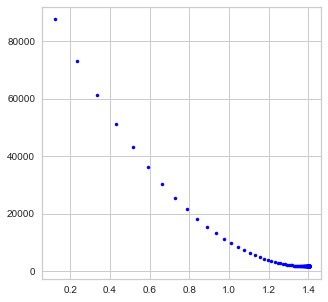

In [651]:
plt.figure(figsize=(5,5))
plt.plot(coefficient, cost_val, '.r',color='blue',label="cost function curve")


In [728]:
def Simple_Gradient_Descent_plot_y_pred(x,y,epochs,learning_rate,n):
    
    # to plot
    cost_list=[]
    intercept =[]
    coefficient =[]
    
    # to calculate
    
    m_current=0
    c_current=0
    
    plt.scatter(x, y, color = "red", alpha=1, s=7) 
    
    for i in range(epochs):
        
        y_pred = (m_current * x) + c_current  # mx + c
        
        cost = 1/n * sum ([value**2 for value in (y-y_pred)]) #MSE loss function
        
        #derivatives of m and c
        
        md = -2/n * sum(x*(y - y_pred))  # -2/n * sum ( x * ( y - y_pred) )
        cd = -2/n *sum( y - y_pred)  # -2/n * sum ( y - y_pred) 
        
        m_current = m_current - (learning_rate * md)  # step_size = learning_rate * md 
        c_current = c_current - (learning_rate * md)  # step_size = learning_rate * cd
        
        
        plt.plot(x, y_pred, color = "blue",linewidth='.1') 
        plt.xlabel('X_values')
        plt.ylabel('Y_pred')
        
        cost_list.append(cost)
        intercept.append(m_current)
        coefficient.append(c_current)


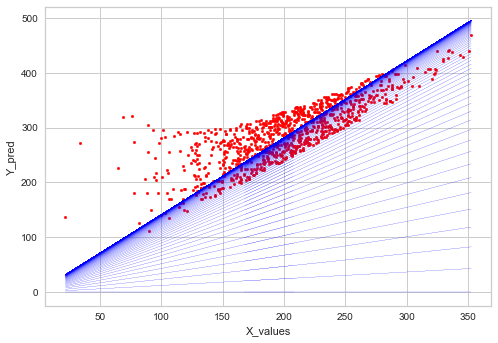

In [729]:
epochs = 300
n = len(x)
learning_rate = 0.000001
Simple_Gradient_Descent_plot_y_pred(x,y,epochs,learning_rate,n)

In [703]:
epochs = 3000
n = len(x)
learning_rate = 0.00000001
cost_val, intercept,coefficient, = Simple_Gradient_Descent(x,y,epochs,learning_rate,n)

>epoch=0, m=0.0,c=0.0, md=-122334.6,cd=-581.9,step_size_m=-0.0,step_size_c=-0.0,cost=87687.5
           
>epoch=1, m=0.0,c=0.0, md=-122227.8,cd=-581.4,step_size_m=-0.0,step_size_c=-0.0,cost=87537.2
           
>epoch=2, m=0.0,c=0.0, md=-122121.1,cd=-580.9,step_size_m=-0.0,step_size_c=-0.0,cost=87387.2
           
>epoch=3, m=0.0,c=0.0, md=-122014.5,cd=-580.4,step_size_m=-0.0,step_size_c=-0.0,cost=87237.4
           
>epoch=4, m=0.0,c=0.0, md=-121907.9,cd=-579.9,step_size_m=-0.0,step_size_c=-0.0,cost=87087.9
           
>epoch=5, m=0.0,c=0.0, md=-121801.5,cd=-579.4,step_size_m=-0.0,step_size_c=-0.0,cost=86938.6
           
>epoch=6, m=0.0,c=0.0, md=-121695.2,cd=-578.9,step_size_m=-0.0,step_size_c=-0.0,cost=86789.6
           
>epoch=7, m=0.0,c=0.0, md=-121588.9,cd=-578.4,step_size_m=-0.0,step_size_c=-0.0,cost=86640.9
           
>epoch=8, m=0.0,c=0.0, md=-121482.8,cd=-577.9,step_size_m=-0.0,step_size_c=-0.0,cost=86492.4
           
>epoch=9, m=0.0,c=0.0, md=-121376.7,cd=-577.4,step_size

>epoch=79, m=0.1,c=0.1, md=-114178.4,cd=-543.9,step_size_m=-0.0,step_size_c=-0.0,cost=76586.6
           
>epoch=80, m=0.1,c=0.1, md=-114078.7,cd=-543.4,step_size_m=-0.0,step_size_c=-0.0,cost=76455.7
           
>epoch=81, m=0.1,c=0.1, md=-113979.1,cd=-543.0,step_size_m=-0.0,step_size_c=-0.0,cost=76325.0
           
>epoch=82, m=0.1,c=0.1, md=-113879.6,cd=-542.5,step_size_m=-0.0,step_size_c=-0.0,cost=76194.5
           
>epoch=83, m=0.1,c=0.1, md=-113780.2,cd=-542.1,step_size_m=-0.0,step_size_c=-0.0,cost=76064.3
           
>epoch=84, m=0.1,c=0.1, md=-113680.8,cd=-541.6,step_size_m=-0.0,step_size_c=-0.0,cost=75934.3
           
>epoch=85, m=0.1,c=0.1, md=-113581.6,cd=-541.1,step_size_m=-0.0,step_size_c=-0.0,cost=75804.5
           
>epoch=86, m=0.1,c=0.1, md=-113482.4,cd=-540.7,step_size_m=-0.0,step_size_c=-0.0,cost=75674.9
           
>epoch=87, m=0.1,c=0.1, md=-113383.4,cd=-540.2,step_size_m=-0.0,step_size_c=-0.0,cost=75545.6
           
>epoch=88, m=0.1,c=0.1, md=-113284.4,cd=-539.7

>epoch=184, m=0.2,c=0.2, md=-104173.3,cd=-497.3,step_size_m=-0.0,step_size_c=-0.0,cost=64015.0
           
>epoch=185, m=0.2,c=0.2, md=-104082.4,cd=-496.9,step_size_m=-0.0,step_size_c=-0.0,cost=63906.0
           
>epoch=186, m=0.2,c=0.2, md=-103991.5,cd=-496.4,step_size_m=-0.0,step_size_c=-0.0,cost=63797.2
           
>epoch=187, m=0.2,c=0.2, md=-103900.7,cd=-496.0,step_size_m=-0.0,step_size_c=-0.0,cost=63688.6
           
>epoch=188, m=0.2,c=0.2, md=-103810.0,cd=-495.6,step_size_m=-0.0,step_size_c=-0.0,cost=63580.1
           
>epoch=189, m=0.2,c=0.2, md=-103719.4,cd=-495.2,step_size_m=-0.0,step_size_c=-0.0,cost=63471.9
           
>epoch=190, m=0.2,c=0.2, md=-103628.8,cd=-494.8,step_size_m=-0.0,step_size_c=-0.0,cost=63363.9
           
>epoch=191, m=0.2,c=0.2, md=-103538.4,cd=-494.3,step_size_m=-0.0,step_size_c=-0.0,cost=63256.0
           
>epoch=192, m=0.2,c=0.2, md=-103448.0,cd=-493.9,step_size_m=-0.0,step_size_c=-0.0,cost=63148.3
           
>epoch=193, m=0.2,c=0.2, md=-103357.7

>epoch=307, m=0.3,c=0.3, md=-93562.4,cd=-447.8,step_size_m=-0.0,step_size_c=-0.0,cost=51940.8
           
>epoch=308, m=0.3,c=0.3, md=-93480.7,cd=-447.5,step_size_m=-0.0,step_size_c=-0.0,cost=51852.8
           
>epoch=309, m=0.3,c=0.3, md=-93399.1,cd=-447.1,step_size_m=-0.0,step_size_c=-0.0,cost=51765.1
           
>epoch=310, m=0.3,c=0.3, md=-93317.6,cd=-446.7,step_size_m=-0.0,step_size_c=-0.0,cost=51677.5
           
>epoch=311, m=0.3,c=0.3, md=-93236.1,cd=-446.3,step_size_m=-0.0,step_size_c=-0.0,cost=51590.0
           
>epoch=312, m=0.3,c=0.3, md=-93154.7,cd=-445.9,step_size_m=-0.0,step_size_c=-0.0,cost=51502.7
           
>epoch=313, m=0.3,c=0.3, md=-93073.4,cd=-445.6,step_size_m=-0.0,step_size_c=-0.0,cost=51415.5
           
>epoch=314, m=0.3,c=0.3, md=-92992.1,cd=-445.2,step_size_m=-0.0,step_size_c=-0.0,cost=51328.5
           
>epoch=315, m=0.3,c=0.3, md=-92911.0,cd=-444.8,step_size_m=-0.0,step_size_c=-0.0,cost=51241.7
           
>epoch=316, m=0.3,c=0.3, md=-92829.8,cd=-444.4

>epoch=396, m=0.4,c=0.4, md=-86565.1,cd=-415.2,step_size_m=-0.0,step_size_c=-0.0,cost=44687.4
           
>epoch=397, m=0.4,c=0.4, md=-86489.5,cd=-414.9,step_size_m=-0.0,step_size_c=-0.0,cost=44612.2
           
>epoch=398, m=0.4,c=0.4, md=-86414.0,cd=-414.5,step_size_m=-0.0,step_size_c=-0.0,cost=44537.0
           
>epoch=399, m=0.4,c=0.4, md=-86338.6,cd=-414.2,step_size_m=-0.0,step_size_c=-0.0,cost=44462.0
           
>epoch=400, m=0.4,c=0.4, md=-86263.2,cd=-413.8,step_size_m=-0.0,step_size_c=-0.0,cost=44387.2
           
>epoch=401, m=0.4,c=0.4, md=-86187.9,cd=-413.5,step_size_m=-0.0,step_size_c=-0.0,cost=44312.4
           
>epoch=402, m=0.4,c=0.4, md=-86112.7,cd=-413.1,step_size_m=-0.0,step_size_c=-0.0,cost=44237.8
           
>epoch=403, m=0.4,c=0.4, md=-86037.5,cd=-412.8,step_size_m=-0.0,step_size_c=-0.0,cost=44163.3
           
>epoch=404, m=0.4,c=0.4, md=-85962.4,cd=-412.4,step_size_m=-0.0,step_size_c=-0.0,cost=44089.0
           
>epoch=405, m=0.4,c=0.4, md=-85887.3,cd=-412.1

           
>epoch=486, m=0.5,c=0.5, md=-80021.2,cd=-384.8,step_size_m=-0.0,step_size_c=-0.0,cost=38414.0
           
>epoch=487, m=0.5,c=0.5, md=-79951.4,cd=-384.4,step_size_m=-0.0,step_size_c=-0.0,cost=38349.6
           
>epoch=488, m=0.5,c=0.5, md=-79881.6,cd=-384.1,step_size_m=-0.0,step_size_c=-0.0,cost=38285.4
           
>epoch=489, m=0.5,c=0.5, md=-79811.8,cd=-383.8,step_size_m=-0.0,step_size_c=-0.0,cost=38221.3
           
>epoch=490, m=0.5,c=0.5, md=-79742.1,cd=-383.5,step_size_m=-0.0,step_size_c=-0.0,cost=38157.4
           
>epoch=491, m=0.5,c=0.5, md=-79672.5,cd=-383.1,step_size_m=-0.0,step_size_c=-0.0,cost=38093.5
           
>epoch=492, m=0.5,c=0.5, md=-79603.0,cd=-382.8,step_size_m=-0.0,step_size_c=-0.0,cost=38029.7
           
>epoch=493, m=0.5,c=0.5, md=-79533.5,cd=-382.5,step_size_m=-0.0,step_size_c=-0.0,cost=37966.1
           
>epoch=494, m=0.5,c=0.5, md=-79464.0,cd=-382.2,step_size_m=-0.0,step_size_c=-0.0,cost=37902.6
           
>epoch=495, m=0.5,c=0.5, md=-79394

>epoch=587, m=0.6,c=0.6, md=-73264.7,cd=-353.3,step_size_m=-0.0,step_size_c=-0.0,cost=32453.8
           
>epoch=588, m=0.6,c=0.6, md=-73200.8,cd=-353.0,step_size_m=-0.0,step_size_c=-0.0,cost=32399.8
           
>epoch=589, m=0.6,c=0.6, md=-73136.9,cd=-352.7,step_size_m=-0.0,step_size_c=-0.0,cost=32346.0
           
>epoch=590, m=0.6,c=0.6, md=-73073.0,cd=-352.4,step_size_m=-0.0,step_size_c=-0.0,cost=32292.3
           
>epoch=591, m=0.6,c=0.6, md=-73009.2,cd=-352.1,step_size_m=-0.0,step_size_c=-0.0,cost=32238.7
           
>epoch=592, m=0.6,c=0.6, md=-72945.5,cd=-351.8,step_size_m=-0.0,step_size_c=-0.0,cost=32185.1
           
>epoch=593, m=0.6,c=0.6, md=-72881.8,cd=-351.5,step_size_m=-0.0,step_size_c=-0.0,cost=32131.7
           
>epoch=594, m=0.6,c=0.6, md=-72818.2,cd=-351.2,step_size_m=-0.0,step_size_c=-0.0,cost=32078.3
           
>epoch=595, m=0.6,c=0.6, md=-72754.6,cd=-350.9,step_size_m=-0.0,step_size_c=-0.0,cost=32025.1
           
>epoch=596, m=0.6,c=0.6, md=-72691.1,cd=-350.6

>epoch=687, m=0.6,c=0.6, md=-67137.3,cd=-324.7,step_size_m=-0.0,step_size_c=-0.0,cost=27502.8
           
>epoch=688, m=0.6,c=0.6, md=-67078.7,cd=-324.4,step_size_m=-0.0,step_size_c=-0.0,cost=27457.5
           
>epoch=689, m=0.6,c=0.6, md=-67020.2,cd=-324.2,step_size_m=-0.0,step_size_c=-0.0,cost=27412.3
           
>epoch=690, m=0.6,c=0.6, md=-66961.6,cd=-323.9,step_size_m=-0.0,step_size_c=-0.0,cost=27367.2
           
>epoch=691, m=0.6,c=0.6, md=-66903.2,cd=-323.6,step_size_m=-0.0,step_size_c=-0.0,cost=27322.1
           
>epoch=692, m=0.6,c=0.6, md=-66844.8,cd=-323.4,step_size_m=-0.0,step_size_c=-0.0,cost=27277.2
           
>epoch=693, m=0.6,c=0.6, md=-66786.4,cd=-323.1,step_size_m=-0.0,step_size_c=-0.0,cost=27232.3
           
>epoch=694, m=0.6,c=0.6, md=-66728.1,cd=-322.8,step_size_m=-0.0,step_size_c=-0.0,cost=27187.5
           
>epoch=695, m=0.6,c=0.6, md=-66669.9,cd=-322.5,step_size_m=-0.0,step_size_c=-0.0,cost=27142.8
           
>epoch=696, m=0.6,c=0.6, md=-66611.7,cd=-322.3

>epoch=796, m=0.7,c=0.7, md=-61040.7,cd=-296.3,step_size_m=-0.0,step_size_c=-0.0,cost=23005.4
           
>epoch=797, m=0.7,c=0.7, md=-60987.4,cd=-296.1,step_size_m=-0.0,step_size_c=-0.0,cost=22968.0
           
>epoch=798, m=0.7,c=0.7, md=-60934.2,cd=-295.8,step_size_m=-0.0,step_size_c=-0.0,cost=22930.7
           
>epoch=799, m=0.7,c=0.7, md=-60881.0,cd=-295.6,step_size_m=-0.0,step_size_c=-0.0,cost=22893.4
           
>epoch=800, m=0.7,c=0.7, md=-60827.8,cd=-295.3,step_size_m=-0.0,step_size_c=-0.0,cost=22856.1
           
>epoch=801, m=0.7,c=0.7, md=-60774.7,cd=-295.1,step_size_m=-0.0,step_size_c=-0.0,cost=22819.0
           
>epoch=802, m=0.7,c=0.7, md=-60721.6,cd=-294.8,step_size_m=-0.0,step_size_c=-0.0,cost=22781.9
           
>epoch=803, m=0.7,c=0.7, md=-60668.6,cd=-294.6,step_size_m=-0.0,step_size_c=-0.0,cost=22744.8
           
>epoch=804, m=0.7,c=0.7, md=-60615.7,cd=-294.3,step_size_m=-0.0,step_size_c=-0.0,cost=22707.9
           
>epoch=805, m=0.7,c=0.7, md=-60562.8,cd=-294.1

>epoch=899, m=0.8,c=0.8, md=-55789.3,cd=-271.8,step_size_m=-0.0,step_size_c=-0.0,cost=19474.5
           
>epoch=900, m=0.8,c=0.8, md=-55740.6,cd=-271.6,step_size_m=-0.0,step_size_c=-0.0,cost=19443.2
           
>epoch=901, m=0.8,c=0.8, md=-55691.9,cd=-271.4,step_size_m=-0.0,step_size_c=-0.0,cost=19412.0
           
>epoch=902, m=0.8,c=0.8, md=-55643.3,cd=-271.2,step_size_m=-0.0,step_size_c=-0.0,cost=19380.9
           
>epoch=903, m=0.8,c=0.8, md=-55594.7,cd=-270.9,step_size_m=-0.0,step_size_c=-0.0,cost=19349.8
           
>epoch=904, m=0.8,c=0.8, md=-55546.2,cd=-270.7,step_size_m=-0.0,step_size_c=-0.0,cost=19318.7
           
>epoch=905, m=0.8,c=0.8, md=-55497.7,cd=-270.5,step_size_m=-0.0,step_size_c=-0.0,cost=19287.7
           
>epoch=906, m=0.8,c=0.8, md=-55449.2,cd=-270.3,step_size_m=-0.0,step_size_c=-0.0,cost=19256.8
           
>epoch=907, m=0.8,c=0.8, md=-55400.8,cd=-270.0,step_size_m=-0.0,step_size_c=-0.0,cost=19225.9
           
>epoch=908, m=0.8,c=0.8, md=-55352.4,cd=-269.8

>epoch=1007, m=0.8,c=0.8, md=-50767.4,cd=-248.4,step_size_m=-0.0,step_size_c=-0.0,cost=16394.8
           
>epoch=1008, m=0.8,c=0.8, md=-50723.1,cd=-248.2,step_size_m=-0.0,step_size_c=-0.0,cost=16368.9
           
>epoch=1009, m=0.8,c=0.8, md=-50678.8,cd=-248.0,step_size_m=-0.0,step_size_c=-0.0,cost=16343.1
           
>epoch=1010, m=0.8,c=0.8, md=-50634.6,cd=-247.8,step_size_m=-0.0,step_size_c=-0.0,cost=16317.3
           
>epoch=1011, m=0.8,c=0.8, md=-50590.4,cd=-247.6,step_size_m=-0.0,step_size_c=-0.0,cost=16291.5
           
>epoch=1012, m=0.8,c=0.8, md=-50546.2,cd=-247.4,step_size_m=-0.0,step_size_c=-0.0,cost=16265.8
           
>epoch=1013, m=0.8,c=0.8, md=-50502.1,cd=-247.2,step_size_m=-0.0,step_size_c=-0.0,cost=16240.2
           
>epoch=1014, m=0.8,c=0.8, md=-50458.0,cd=-247.0,step_size_m=-0.0,step_size_c=-0.0,cost=16214.5
           
>epoch=1015, m=0.8,c=0.8, md=-50414.0,cd=-246.8,step_size_m=-0.0,step_size_c=-0.0,cost=16189.0
           
>epoch=1016, m=0.8,c=0.8, md=-50369.9

>epoch=1103, m=0.9,c=0.9, md=-46684.4,cd=-229.4,step_size_m=-0.0,step_size_c=-0.0,cost=14104.7
           
>epoch=1104, m=0.9,c=0.9, md=-46643.6,cd=-229.2,step_size_m=-0.0,step_size_c=-0.0,cost=14082.8
           
>epoch=1105, m=0.9,c=0.9, md=-46602.9,cd=-229.0,step_size_m=-0.0,step_size_c=-0.0,cost=14061.0
           
>epoch=1106, m=0.9,c=0.9, md=-46562.2,cd=-228.9,step_size_m=-0.0,step_size_c=-0.0,cost=14039.2
           
>epoch=1107, m=0.9,c=0.9, md=-46521.6,cd=-228.7,step_size_m=-0.0,step_size_c=-0.0,cost=14017.4
           
>epoch=1108, m=0.9,c=0.9, md=-46481.0,cd=-228.5,step_size_m=-0.0,step_size_c=-0.0,cost=13995.6
           
>epoch=1109, m=0.9,c=0.9, md=-46440.4,cd=-228.3,step_size_m=-0.0,step_size_c=-0.0,cost=13973.9
           
>epoch=1110, m=0.9,c=0.9, md=-46399.8,cd=-228.1,step_size_m=-0.0,step_size_c=-0.0,cost=13952.3
           
>epoch=1111, m=0.9,c=0.9, md=-46359.3,cd=-227.9,step_size_m=-0.0,step_size_c=-0.0,cost=13930.7
           
>epoch=1112, m=0.9,c=0.9, md=-46318.9

>epoch=1180, m=0.9,c=0.9, md=-43648.0,cd=-215.3,step_size_m=-0.0,step_size_c=-0.0,cost=12526.1
           
>epoch=1181, m=0.9,c=0.9, md=-43609.9,cd=-215.1,step_size_m=-0.0,step_size_c=-0.0,cost=12507.0
           
>epoch=1182, m=0.9,c=0.9, md=-43571.9,cd=-214.9,step_size_m=-0.0,step_size_c=-0.0,cost=12487.9
           
>epoch=1183, m=0.9,c=0.9, md=-43533.8,cd=-214.7,step_size_m=-0.0,step_size_c=-0.0,cost=12468.8
           
>epoch=1184, m=0.9,c=0.9, md=-43495.8,cd=-214.6,step_size_m=-0.0,step_size_c=-0.0,cost=12449.8
           
>epoch=1185, m=0.9,c=0.9, md=-43457.9,cd=-214.4,step_size_m=-0.0,step_size_c=-0.0,cost=12430.8
           
>epoch=1186, m=0.9,c=0.9, md=-43419.9,cd=-214.2,step_size_m=-0.0,step_size_c=-0.0,cost=12411.8
           
>epoch=1187, m=0.9,c=0.9, md=-43382.0,cd=-214.0,step_size_m=-0.0,step_size_c=-0.0,cost=12392.8
           
>epoch=1188, m=0.9,c=0.9, md=-43344.1,cd=-213.9,step_size_m=-0.0,step_size_c=-0.0,cost=12373.9
           
>epoch=1189, m=0.9,c=0.9, md=-43306.3

>epoch=1295, m=0.9,c=0.9, md=-39477.0,cd=-195.8,step_size_m=-0.0,step_size_c=-0.0,cost=10530.5
           
>epoch=1296, m=0.9,c=0.9, md=-39442.5,cd=-195.7,step_size_m=-0.0,step_size_c=-0.0,cost=10514.9
           
>epoch=1297, m=1.0,c=1.0, md=-39408.1,cd=-195.5,step_size_m=-0.0,step_size_c=-0.0,cost=10499.2
           
>epoch=1298, m=1.0,c=1.0, md=-39373.7,cd=-195.4,step_size_m=-0.0,step_size_c=-0.0,cost=10483.6
           
>epoch=1299, m=1.0,c=1.0, md=-39339.3,cd=-195.2,step_size_m=-0.0,step_size_c=-0.0,cost=10468.1
           
>epoch=1300, m=1.0,c=1.0, md=-39305.0,cd=-195.0,step_size_m=-0.0,step_size_c=-0.0,cost=10452.5
           
>epoch=1301, m=1.0,c=1.0, md=-39270.7,cd=-194.9,step_size_m=-0.0,step_size_c=-0.0,cost=10437.0
           
>epoch=1302, m=1.0,c=1.0, md=-39236.4,cd=-194.7,step_size_m=-0.0,step_size_c=-0.0,cost=10421.5
           
>epoch=1303, m=1.0,c=1.0, md=-39202.1,cd=-194.6,step_size_m=-0.0,step_size_c=-0.0,cost=10406.0
           
>epoch=1304, m=1.0,c=1.0, md=-39167.9

>epoch=1386, m=1.0,c=1.0, md=-36460.9,cd=-181.8,step_size_m=-0.0,step_size_c=-0.0,cost=9212.2
           
>epoch=1387, m=1.0,c=1.0, md=-36429.1,cd=-181.6,step_size_m=-0.0,step_size_c=-0.0,cost=9198.9
           
>epoch=1388, m=1.0,c=1.0, md=-36397.2,cd=-181.5,step_size_m=-0.0,step_size_c=-0.0,cost=9185.5
           
>epoch=1389, m=1.0,c=1.0, md=-36365.5,cd=-181.3,step_size_m=-0.0,step_size_c=-0.0,cost=9172.2
           
>epoch=1390, m=1.0,c=1.0, md=-36333.7,cd=-181.2,step_size_m=-0.0,step_size_c=-0.0,cost=9158.9
           
>epoch=1391, m=1.0,c=1.0, md=-36302.0,cd=-181.0,step_size_m=-0.0,step_size_c=-0.0,cost=9145.7
           
>epoch=1392, m=1.0,c=1.0, md=-36270.3,cd=-180.9,step_size_m=-0.0,step_size_c=-0.0,cost=9132.4
           
>epoch=1393, m=1.0,c=1.0, md=-36238.6,cd=-180.7,step_size_m=-0.0,step_size_c=-0.0,cost=9119.2
           
>epoch=1394, m=1.0,c=1.0, md=-36207.0,cd=-180.6,step_size_m=-0.0,step_size_c=-0.0,cost=9106.0
           
>epoch=1395, m=1.0,c=1.0, md=-36175.4,cd=-180.

>epoch=1481, m=1.0,c=1.0, md=-33557.7,cd=-168.3,step_size_m=-0.0,step_size_c=-0.0,cost=8042.2
           
>epoch=1482, m=1.0,c=1.0, md=-33528.5,cd=-168.1,step_size_m=-0.0,step_size_c=-0.0,cost=8030.9
           
>epoch=1483, m=1.0,c=1.0, md=-33499.2,cd=-168.0,step_size_m=-0.0,step_size_c=-0.0,cost=8019.6
           
>epoch=1484, m=1.0,c=1.0, md=-33469.9,cd=-167.8,step_size_m=-0.0,step_size_c=-0.0,cost=8008.3
           
>epoch=1485, m=1.0,c=1.0, md=-33440.7,cd=-167.7,step_size_m=-0.0,step_size_c=-0.0,cost=7997.1
           
>epoch=1486, m=1.0,c=1.0, md=-33411.5,cd=-167.6,step_size_m=-0.0,step_size_c=-0.0,cost=7985.8
           
>epoch=1487, m=1.0,c=1.0, md=-33382.4,cd=-167.4,step_size_m=-0.0,step_size_c=-0.0,cost=7974.6
           
>epoch=1488, m=1.0,c=1.0, md=-33353.2,cd=-167.3,step_size_m=-0.0,step_size_c=-0.0,cost=7963.4
           
>epoch=1489, m=1.0,c=1.0, md=-33324.1,cd=-167.2,step_size_m=-0.0,step_size_c=-0.0,cost=7952.2
           
>epoch=1490, m=1.0,c=1.0, md=-33295.0,cd=-167.

>epoch=1561, m=1.0,c=1.0, md=-31293.1,cd=-157.7,step_size_m=-0.0,step_size_c=-0.0,cost=7196.8
           
>epoch=1562, m=1.0,c=1.0, md=-31265.7,cd=-157.6,step_size_m=-0.0,step_size_c=-0.0,cost=7187.0
           
>epoch=1563, m=1.0,c=1.0, md=-31238.5,cd=-157.5,step_size_m=-0.0,step_size_c=-0.0,cost=7177.2
           
>epoch=1564, m=1.0,c=1.0, md=-31211.2,cd=-157.3,step_size_m=-0.0,step_size_c=-0.0,cost=7167.4
           
>epoch=1565, m=1.0,c=1.0, md=-31183.9,cd=-157.2,step_size_m=-0.0,step_size_c=-0.0,cost=7157.6
           
>epoch=1566, m=1.0,c=1.0, md=-31156.7,cd=-157.1,step_size_m=-0.0,step_size_c=-0.0,cost=7147.8
           
>epoch=1567, m=1.0,c=1.0, md=-31129.5,cd=-156.9,step_size_m=-0.0,step_size_c=-0.0,cost=7138.0
           
>epoch=1568, m=1.0,c=1.0, md=-31102.3,cd=-156.8,step_size_m=-0.0,step_size_c=-0.0,cost=7128.3
           
>epoch=1569, m=1.0,c=1.0, md=-31075.2,cd=-156.7,step_size_m=-0.0,step_size_c=-0.0,cost=7118.6
           
>epoch=1570, m=1.0,c=1.0, md=-31048.1,cd=-156.

>epoch=1644, m=1.1,c=1.1, md=-29104.9,cd=-147.5,step_size_m=-0.0,step_size_c=-0.0,cost=6436.1
           
>epoch=1645, m=1.1,c=1.1, md=-29079.4,cd=-147.4,step_size_m=-0.0,step_size_c=-0.0,cost=6427.5
           
>epoch=1646, m=1.1,c=1.1, md=-29054.1,cd=-147.3,step_size_m=-0.0,step_size_c=-0.0,cost=6419.0
           
>epoch=1647, m=1.1,c=1.1, md=-29028.7,cd=-147.2,step_size_m=-0.0,step_size_c=-0.0,cost=6410.6
           
>epoch=1648, m=1.1,c=1.1, md=-29003.4,cd=-147.0,step_size_m=-0.0,step_size_c=-0.0,cost=6402.1
           
>epoch=1649, m=1.1,c=1.1, md=-28978.0,cd=-146.9,step_size_m=-0.0,step_size_c=-0.0,cost=6393.6
           
>epoch=1650, m=1.1,c=1.1, md=-28952.7,cd=-146.8,step_size_m=-0.0,step_size_c=-0.0,cost=6385.2
           
>epoch=1651, m=1.1,c=1.1, md=-28927.5,cd=-146.7,step_size_m=-0.0,step_size_c=-0.0,cost=6376.8
           
>epoch=1652, m=1.1,c=1.1, md=-28902.2,cd=-146.6,step_size_m=-0.0,step_size_c=-0.0,cost=6368.4
           
>epoch=1653, m=1.1,c=1.1, md=-28877.0,cd=-146.

>epoch=1743, m=1.1,c=1.1, md=-26694.0,cd=-136.3,step_size_m=-0.0,step_size_c=-0.0,cost=5661.7
           
>epoch=1744, m=1.1,c=1.1, md=-26670.7,cd=-136.2,step_size_m=-0.0,step_size_c=-0.0,cost=5654.5
           
>epoch=1745, m=1.1,c=1.1, md=-26647.4,cd=-136.1,step_size_m=-0.0,step_size_c=-0.0,cost=5647.4
           
>epoch=1746, m=1.1,c=1.1, md=-26624.2,cd=-136.0,step_size_m=-0.0,step_size_c=-0.0,cost=5640.2
           
>epoch=1747, m=1.1,c=1.1, md=-26600.9,cd=-135.8,step_size_m=-0.0,step_size_c=-0.0,cost=5633.1
           
>epoch=1748, m=1.1,c=1.1, md=-26577.7,cd=-135.7,step_size_m=-0.0,step_size_c=-0.0,cost=5626.0
           
>epoch=1749, m=1.1,c=1.1, md=-26554.5,cd=-135.6,step_size_m=-0.0,step_size_c=-0.0,cost=5618.9
           
>epoch=1750, m=1.1,c=1.1, md=-26531.3,cd=-135.5,step_size_m=-0.0,step_size_c=-0.0,cost=5611.8
           
>epoch=1751, m=1.1,c=1.1, md=-26508.2,cd=-135.4,step_size_m=-0.0,step_size_c=-0.0,cost=5604.8
           
>epoch=1752, m=1.1,c=1.1, md=-26485.0,cd=-135.

>epoch=1851, m=1.1,c=1.1, md=-24291.2,cd=-125.1,step_size_m=-0.0,step_size_c=-0.0,cost=4956.4
           
>epoch=1852, m=1.1,c=1.1, md=-24270.0,cd=-125.0,step_size_m=-0.0,step_size_c=-0.0,cost=4950.5
           
>epoch=1853, m=1.1,c=1.1, md=-24248.8,cd=-124.9,step_size_m=-0.0,step_size_c=-0.0,cost=4944.6
           
>epoch=1854, m=1.1,c=1.1, md=-24227.6,cd=-124.8,step_size_m=-0.0,step_size_c=-0.0,cost=4938.7
           
>epoch=1855, m=1.1,c=1.1, md=-24206.5,cd=-124.7,step_size_m=-0.0,step_size_c=-0.0,cost=4932.8
           
>epoch=1856, m=1.1,c=1.1, md=-24185.3,cd=-124.6,step_size_m=-0.0,step_size_c=-0.0,cost=4926.9
           
>epoch=1857, m=1.1,c=1.1, md=-24164.2,cd=-124.5,step_size_m=-0.0,step_size_c=-0.0,cost=4921.0
           
>epoch=1858, m=1.1,c=1.1, md=-24143.1,cd=-124.4,step_size_m=-0.0,step_size_c=-0.0,cost=4915.2
           
>epoch=1859, m=1.1,c=1.1, md=-24122.0,cd=-124.3,step_size_m=-0.0,step_size_c=-0.0,cost=4909.3
           
>epoch=1860, m=1.1,c=1.1, md=-24101.0,cd=-124.

>epoch=1968, m=1.2,c=1.2, md=-21931.6,cd=-114.1,step_size_m=-0.0,step_size_c=-0.0,cost=4328.5
           
>epoch=1969, m=1.2,c=1.2, md=-21912.4,cd=-114.0,step_size_m=-0.0,step_size_c=-0.0,cost=4323.7
           
>epoch=1970, m=1.2,c=1.2, md=-21893.3,cd=-113.9,step_size_m=-0.0,step_size_c=-0.0,cost=4318.9
           
>epoch=1971, m=1.2,c=1.2, md=-21874.2,cd=-113.8,step_size_m=-0.0,step_size_c=-0.0,cost=4314.1
           
>epoch=1972, m=1.2,c=1.2, md=-21855.1,cd=-113.7,step_size_m=-0.0,step_size_c=-0.0,cost=4309.3
           
>epoch=1973, m=1.2,c=1.2, md=-21836.0,cd=-113.6,step_size_m=-0.0,step_size_c=-0.0,cost=4304.5
           
>epoch=1974, m=1.2,c=1.2, md=-21816.9,cd=-113.6,step_size_m=-0.0,step_size_c=-0.0,cost=4299.7
           
>epoch=1975, m=1.2,c=1.2, md=-21797.9,cd=-113.5,step_size_m=-0.0,step_size_c=-0.0,cost=4294.9
           
>epoch=1976, m=1.2,c=1.2, md=-21778.9,cd=-113.4,step_size_m=-0.0,step_size_c=-0.0,cost=4290.1
           
>epoch=1977, m=1.2,c=1.2, md=-21759.8,cd=-113.

           
>epoch=2074, m=1.2,c=1.2, md=-19992.3,cd=-105.0,step_size_m=-0.0,step_size_c=-0.0,cost=3860.5
           
>epoch=2075, m=1.2,c=1.2, md=-19974.8,cd=-105.0,step_size_m=-0.0,step_size_c=-0.0,cost=3856.4
           
>epoch=2076, m=1.2,c=1.2, md=-19957.4,cd=-104.9,step_size_m=-0.0,step_size_c=-0.0,cost=3852.4
           
>epoch=2077, m=1.2,c=1.2, md=-19940.0,cd=-104.8,step_size_m=-0.0,step_size_c=-0.0,cost=3848.4
           
>epoch=2078, m=1.2,c=1.2, md=-19922.6,cd=-104.7,step_size_m=-0.0,step_size_c=-0.0,cost=3844.4
           
>epoch=2079, m=1.2,c=1.2, md=-19905.2,cd=-104.6,step_size_m=-0.0,step_size_c=-0.0,cost=3840.5
           
>epoch=2080, m=1.2,c=1.2, md=-19887.8,cd=-104.6,step_size_m=-0.0,step_size_c=-0.0,cost=3836.5
           
>epoch=2081, m=1.2,c=1.2, md=-19870.4,cd=-104.5,step_size_m=-0.0,step_size_c=-0.0,cost=3832.5
           
>epoch=2082, m=1.2,c=1.2, md=-19853.1,cd=-104.4,step_size_m=-0.0,step_size_c=-0.0,cost=3828.5
           
>epoch=2083, m=1.2,c=1.2, md=-1983

           
>epoch=2159, m=1.2,c=1.2, md=-18561.9,cd=-98.4,step_size_m=-0.0,step_size_c=-0.0,cost=3542.9
           
>epoch=2160, m=1.2,c=1.2, md=-18545.7,cd=-98.3,step_size_m=-0.0,step_size_c=-0.0,cost=3539.5
           
>epoch=2161, m=1.2,c=1.2, md=-18529.5,cd=-98.2,step_size_m=-0.0,step_size_c=-0.0,cost=3536.0
           
>epoch=2162, m=1.2,c=1.2, md=-18513.3,cd=-98.2,step_size_m=-0.0,step_size_c=-0.0,cost=3532.6
           
>epoch=2163, m=1.2,c=1.2, md=-18497.1,cd=-98.1,step_size_m=-0.0,step_size_c=-0.0,cost=3529.1
           
>epoch=2164, m=1.2,c=1.2, md=-18481.0,cd=-98.0,step_size_m=-0.0,step_size_c=-0.0,cost=3525.7
           
>epoch=2165, m=1.2,c=1.2, md=-18464.8,cd=-97.9,step_size_m=-0.0,step_size_c=-0.0,cost=3522.3
           
>epoch=2166, m=1.2,c=1.2, md=-18448.7,cd=-97.9,step_size_m=-0.0,step_size_c=-0.0,cost=3518.8
           
>epoch=2167, m=1.2,c=1.2, md=-18432.6,cd=-97.8,step_size_m=-0.0,step_size_c=-0.0,cost=3515.4
           
>epoch=2168, m=1.2,c=1.2, md=-18416.5,cd=-9

>epoch=2263, m=1.2,c=1.2, md=-16950.1,cd=-90.9,step_size_m=-0.0,step_size_c=-0.0,cost=3213.4
           
>epoch=2264, m=1.2,c=1.2, md=-16935.3,cd=-90.8,step_size_m=-0.0,step_size_c=-0.0,cost=3210.5
           
>epoch=2265, m=1.2,c=1.2, md=-16920.6,cd=-90.7,step_size_m=-0.0,step_size_c=-0.0,cost=3207.6
           
>epoch=2266, m=1.2,c=1.2, md=-16905.8,cd=-90.7,step_size_m=-0.0,step_size_c=-0.0,cost=3204.7
           
>epoch=2267, m=1.2,c=1.2, md=-16891.0,cd=-90.6,step_size_m=-0.0,step_size_c=-0.0,cost=3201.9
           
>epoch=2268, m=1.2,c=1.2, md=-16876.3,cd=-90.5,step_size_m=-0.0,step_size_c=-0.0,cost=3199.0
           
>epoch=2269, m=1.2,c=1.2, md=-16861.5,cd=-90.5,step_size_m=-0.0,step_size_c=-0.0,cost=3196.1
           
>epoch=2270, m=1.2,c=1.2, md=-16846.8,cd=-90.4,step_size_m=-0.0,step_size_c=-0.0,cost=3193.3
           
>epoch=2271, m=1.2,c=1.2, md=-16832.1,cd=-90.3,step_size_m=-0.0,step_size_c=-0.0,cost=3190.4
           
>epoch=2272, m=1.2,c=1.2, md=-16817.4,cd=-90.3,step_siz

>epoch=2358, m=1.2,c=1.2, md=-15600.5,cd=-84.6,step_size_m=-0.0,step_size_c=-0.0,cost=2960.4
           
>epoch=2359, m=1.2,c=1.2, md=-15586.9,cd=-84.5,step_size_m=-0.0,step_size_c=-0.0,cost=2958.0
           
>epoch=2360, m=1.2,c=1.2, md=-15573.3,cd=-84.5,step_size_m=-0.0,step_size_c=-0.0,cost=2955.5
           
>epoch=2361, m=1.2,c=1.2, md=-15559.7,cd=-84.4,step_size_m=-0.0,step_size_c=-0.0,cost=2953.1
           
>epoch=2362, m=1.2,c=1.2, md=-15546.1,cd=-84.3,step_size_m=-0.0,step_size_c=-0.0,cost=2950.7
           
>epoch=2363, m=1.2,c=1.2, md=-15532.5,cd=-84.3,step_size_m=-0.0,step_size_c=-0.0,cost=2948.2
           
>epoch=2364, m=1.2,c=1.2, md=-15519.0,cd=-84.2,step_size_m=-0.0,step_size_c=-0.0,cost=2945.8
           
>epoch=2365, m=1.2,c=1.2, md=-15505.4,cd=-84.1,step_size_m=-0.0,step_size_c=-0.0,cost=2943.4
           
>epoch=2366, m=1.2,c=1.2, md=-15491.9,cd=-84.1,step_size_m=-0.0,step_size_c=-0.0,cost=2941.0
           
>epoch=2367, m=1.2,c=1.2, md=-15478.4,cd=-84.0,step_siz

>epoch=2458, m=1.2,c=1.2, md=-14295.8,cd=-78.5,step_size_m=-0.0,step_size_c=-0.0,cost=2735.8
           
>epoch=2459, m=1.2,c=1.2, md=-14283.3,cd=-78.4,step_size_m=-0.0,step_size_c=-0.0,cost=2733.7
           
>epoch=2460, m=1.2,c=1.2, md=-14270.8,cd=-78.4,step_size_m=-0.0,step_size_c=-0.0,cost=2731.7
           
>epoch=2461, m=1.2,c=1.2, md=-14258.4,cd=-78.3,step_size_m=-0.0,step_size_c=-0.0,cost=2729.7
           
>epoch=2462, m=1.2,c=1.2, md=-14245.9,cd=-78.3,step_size_m=-0.0,step_size_c=-0.0,cost=2727.6
           
>epoch=2463, m=1.2,c=1.2, md=-14233.5,cd=-78.2,step_size_m=-0.0,step_size_c=-0.0,cost=2725.6
           
>epoch=2464, m=1.2,c=1.2, md=-14221.1,cd=-78.2,step_size_m=-0.0,step_size_c=-0.0,cost=2723.5
           
>epoch=2465, m=1.2,c=1.2, md=-14208.7,cd=-78.1,step_size_m=-0.0,step_size_c=-0.0,cost=2721.5
           
>epoch=2466, m=1.2,c=1.2, md=-14196.2,cd=-78.0,step_size_m=-0.0,step_size_c=-0.0,cost=2719.5
           
>epoch=2467, m=1.2,c=1.2, md=-14183.9,cd=-78.0,step_siz

>epoch=2567, m=1.3,c=1.3, md=-12997.6,cd=-72.5,step_size_m=-0.0,step_size_c=-0.0,cost=2531.8
           
>epoch=2568, m=1.3,c=1.3, md=-12986.3,cd=-72.4,step_size_m=-0.0,step_size_c=-0.0,cost=2530.1
           
>epoch=2569, m=1.3,c=1.3, md=-12974.9,cd=-72.4,step_size_m=-0.0,step_size_c=-0.0,cost=2528.4
           
>epoch=2570, m=1.3,c=1.3, md=-12963.6,cd=-72.3,step_size_m=-0.0,step_size_c=-0.0,cost=2526.7
           
>epoch=2571, m=1.3,c=1.3, md=-12952.3,cd=-72.2,step_size_m=-0.0,step_size_c=-0.0,cost=2525.0
           
>epoch=2572, m=1.3,c=1.3, md=-12941.0,cd=-72.2,step_size_m=-0.0,step_size_c=-0.0,cost=2523.3
           
>epoch=2573, m=1.3,c=1.3, md=-12929.7,cd=-72.1,step_size_m=-0.0,step_size_c=-0.0,cost=2521.6
           
>epoch=2574, m=1.3,c=1.3, md=-12918.4,cd=-72.1,step_size_m=-0.0,step_size_c=-0.0,cost=2519.9
           
>epoch=2575, m=1.3,c=1.3, md=-12907.1,cd=-72.0,step_size_m=-0.0,step_size_c=-0.0,cost=2518.3
           
>epoch=2576, m=1.3,c=1.3, md=-12895.8,cd=-72.0,step_siz

>epoch=2667, m=1.3,c=1.3, md=-11910.6,cd=-67.4,step_size_m=-0.0,step_size_c=-0.0,cost=2375.8
           
>epoch=2668, m=1.3,c=1.3, md=-11900.2,cd=-67.3,step_size_m=-0.0,step_size_c=-0.0,cost=2374.4
           
>epoch=2669, m=1.3,c=1.3, md=-11889.8,cd=-67.3,step_size_m=-0.0,step_size_c=-0.0,cost=2373.0
           
>epoch=2670, m=1.3,c=1.3, md=-11879.4,cd=-67.2,step_size_m=-0.0,step_size_c=-0.0,cost=2371.5
           
>epoch=2671, m=1.3,c=1.3, md=-11869.0,cd=-67.2,step_size_m=-0.0,step_size_c=-0.0,cost=2370.1
           
>epoch=2672, m=1.3,c=1.3, md=-11858.7,cd=-67.2,step_size_m=-0.0,step_size_c=-0.0,cost=2368.7
           
>epoch=2673, m=1.3,c=1.3, md=-11848.3,cd=-67.1,step_size_m=-0.0,step_size_c=-0.0,cost=2367.3
           
>epoch=2674, m=1.3,c=1.3, md=-11838.0,cd=-67.1,step_size_m=-0.0,step_size_c=-0.0,cost=2365.9
           
>epoch=2675, m=1.3,c=1.3, md=-11827.6,cd=-67.0,step_size_m=-0.0,step_size_c=-0.0,cost=2364.5
           
>epoch=2676, m=1.3,c=1.3, md=-11817.3,cd=-67.0,step_siz

>epoch=2768, m=1.3,c=1.3, md=-10904.9,cd=-62.7,step_size_m=-0.0,step_size_c=-0.0,cost=2243.6
           
>epoch=2769, m=1.3,c=1.3, md=-10895.4,cd=-62.7,step_size_m=-0.0,step_size_c=-0.0,cost=2242.5
           
>epoch=2770, m=1.3,c=1.3, md=-10885.9,cd=-62.6,step_size_m=-0.0,step_size_c=-0.0,cost=2241.3
           
>epoch=2771, m=1.3,c=1.3, md=-10876.4,cd=-62.6,step_size_m=-0.0,step_size_c=-0.0,cost=2240.1
           
>epoch=2772, m=1.3,c=1.3, md=-10866.9,cd=-62.5,step_size_m=-0.0,step_size_c=-0.0,cost=2238.9
           
>epoch=2773, m=1.3,c=1.3, md=-10857.4,cd=-62.5,step_size_m=-0.0,step_size_c=-0.0,cost=2237.7
           
>epoch=2774, m=1.3,c=1.3, md=-10847.9,cd=-62.4,step_size_m=-0.0,step_size_c=-0.0,cost=2236.5
           
>epoch=2775, m=1.3,c=1.3, md=-10838.4,cd=-62.4,step_size_m=-0.0,step_size_c=-0.0,cost=2235.3
           
>epoch=2776, m=1.3,c=1.3, md=-10829.0,cd=-62.4,step_size_m=-0.0,step_size_c=-0.0,cost=2234.1
           
>epoch=2777, m=1.3,c=1.3, md=-10819.5,cd=-62.3,step_siz

>epoch=2864, m=1.3,c=1.3, md=-10027.9,cd=-58.6,step_size_m=-0.0,step_size_c=-0.0,cost=2137.9
           
>epoch=2865, m=1.3,c=1.3, md=-10019.1,cd=-58.6,step_size_m=-0.0,step_size_c=-0.0,cost=2136.9
           
>epoch=2866, m=1.3,c=1.3, md=-10010.4,cd=-58.5,step_size_m=-0.0,step_size_c=-0.0,cost=2135.9
           
>epoch=2867, m=1.3,c=1.3, md=-10001.6,cd=-58.5,step_size_m=-0.0,step_size_c=-0.0,cost=2134.9
           
>epoch=2868, m=1.3,c=1.3, md=-9992.9,cd=-58.5,step_size_m=-0.0,step_size_c=-0.0,cost=2133.9
           
>epoch=2869, m=1.3,c=1.3, md=-9984.2,cd=-58.4,step_size_m=-0.0,step_size_c=-0.0,cost=2132.9
           
>epoch=2870, m=1.3,c=1.3, md=-9975.5,cd=-58.4,step_size_m=-0.0,step_size_c=-0.0,cost=2131.9
           
>epoch=2871, m=1.3,c=1.3, md=-9966.7,cd=-58.3,step_size_m=-0.0,step_size_c=-0.0,cost=2130.9
           
>epoch=2872, m=1.3,c=1.3, md=-9958.0,cd=-58.3,step_size_m=-0.0,step_size_c=-0.0,cost=2129.9
           
>epoch=2873, m=1.3,c=1.3, md=-9949.4,cd=-58.3,step_size_m=-0

>epoch=2951, m=1.3,c=1.3, md=-9294.1,cd=-55.2,step_size_m=-0.0,step_size_c=-0.0,cost=2056.2
           
>epoch=2952, m=1.3,c=1.3, md=-9286.0,cd=-55.2,step_size_m=-0.0,step_size_c=-0.0,cost=2055.3
           
>epoch=2953, m=1.3,c=1.3, md=-9277.9,cd=-55.1,step_size_m=-0.0,step_size_c=-0.0,cost=2054.5
           
>epoch=2954, m=1.3,c=1.3, md=-9269.8,cd=-55.1,step_size_m=-0.0,step_size_c=-0.0,cost=2053.6
           
>epoch=2955, m=1.3,c=1.3, md=-9261.7,cd=-55.1,step_size_m=-0.0,step_size_c=-0.0,cost=2052.8
           
>epoch=2956, m=1.3,c=1.3, md=-9253.6,cd=-55.0,step_size_m=-0.0,step_size_c=-0.0,cost=2051.9
           
>epoch=2957, m=1.3,c=1.3, md=-9245.6,cd=-55.0,step_size_m=-0.0,step_size_c=-0.0,cost=2051.0
           
>epoch=2958, m=1.3,c=1.3, md=-9237.5,cd=-54.9,step_size_m=-0.0,step_size_c=-0.0,cost=2050.2
           
>epoch=2959, m=1.3,c=1.3, md=-9229.4,cd=-54.9,step_size_m=-0.0,step_size_c=-0.0,cost=2049.3
           
>epoch=2960, m=1.3,c=1.3, md=-9221.4,cd=-54.9,step_size_m=-0.0,s

In [701]:
min(cost_val)

1557.9136109193564

In [698]:
lr = LinearRegression()
lr.fit(x.reshape(-1, 1),y)

LinearRegression()

In [699]:
y_predict = lr.predict(x.reshape(-1,1))

In [700]:
mean_squared_error(y,y_predict)

939.8487532868121

In [684]:
epochs = 3000
n = len(x)
learning_rate = 0.000001
cost_val, intercept,coefficient, = Simple_Gradient_Descent(x2,y2,epochs,learning_rate,n)

>epoch=0, m=0.0,c=0.0, md=-2889.8,cd=-13.3,step_size_m=-0.0,step_size_c=-0.0,cost=918.5
           
>epoch=1, m=0.0,c=0.0, md=-2876.6,cd=-13.2,step_size_m=-0.0,step_size_c=-0.0,cost=910.1
           
>epoch=2, m=0.0,c=0.0, md=-2863.5,cd=-13.2,step_size_m=-0.0,step_size_c=-0.0,cost=901.8
           
>epoch=3, m=0.0,c=0.0, md=-2850.3,cd=-13.1,step_size_m=-0.0,step_size_c=-0.0,cost=893.6
           
>epoch=4, m=0.0,c=0.0, md=-2837.3,cd=-13.1,step_size_m=-0.0,step_size_c=-0.0,cost=885.4
           
>epoch=5, m=0.0,c=0.0, md=-2824.3,cd=-13.0,step_size_m=-0.0,step_size_c=-0.0,cost=877.4
           
>epoch=6, m=0.0,c=0.0, md=-2811.4,cd=-13.0,step_size_m=-0.0,step_size_c=-0.0,cost=869.4
           
>epoch=7, m=0.0,c=0.0, md=-2798.5,cd=-12.9,step_size_m=-0.0,step_size_c=-0.0,cost=861.4
           
>epoch=8, m=0.0,c=0.0, md=-2785.7,cd=-12.8,step_size_m=-0.0,step_size_c=-0.0,cost=853.6
           
>epoch=9, m=0.0,c=0.0, md=-2773.0,cd=-12.8,step_size_m=-0.0,step_size_c=-0.0,cost=845.8
           


>epoch=500, m=0.6,c=0.6, md=-291.6,cd=-1.4,step_size_m=-0.0,step_size_c=-0.0,cost=11.2
           
>epoch=501, m=0.6,c=0.6, md=-290.3,cd=-1.4,step_size_m=-0.0,step_size_c=-0.0,cost=11.1
           
>epoch=502, m=0.6,c=0.6, md=-288.9,cd=-1.4,step_size_m=-0.0,step_size_c=-0.0,cost=11.0
           
>epoch=503, m=0.6,c=0.6, md=-287.6,cd=-1.4,step_size_m=-0.0,step_size_c=-0.0,cost=10.9
           
>epoch=504, m=0.6,c=0.6, md=-286.3,cd=-1.4,step_size_m=-0.0,step_size_c=-0.0,cost=10.9
           
>epoch=505, m=0.6,c=0.6, md=-285.0,cd=-1.4,step_size_m=-0.0,step_size_c=-0.0,cost=10.8
           
>epoch=506, m=0.6,c=0.6, md=-283.7,cd=-1.4,step_size_m=-0.0,step_size_c=-0.0,cost=10.7
           
>epoch=507, m=0.6,c=0.6, md=-282.4,cd=-1.4,step_size_m=-0.0,step_size_c=-0.0,cost=10.6
           
>epoch=508, m=0.6,c=0.6, md=-281.1,cd=-1.4,step_size_m=-0.0,step_size_c=-0.0,cost=10.5
           
>epoch=509, m=0.6,c=0.6, md=-279.8,cd=-1.4,step_size_m=-0.0,step_size_c=-0.0,cost=10.5
           
>epoch=510

           
>epoch=750, m=0.6,c=0.6, md=-92.6,cd=-0.5,step_size_m=-0.0,step_size_c=-0.0,cost=2.8
           
>epoch=751, m=0.6,c=0.6, md=-92.2,cd=-0.5,step_size_m=-0.0,step_size_c=-0.0,cost=2.8
           
>epoch=752, m=0.6,c=0.6, md=-91.8,cd=-0.5,step_size_m=-0.0,step_size_c=-0.0,cost=2.8
           
>epoch=753, m=0.6,c=0.6, md=-91.4,cd=-0.5,step_size_m=-0.0,step_size_c=-0.0,cost=2.8
           
>epoch=754, m=0.6,c=0.6, md=-90.9,cd=-0.5,step_size_m=-0.0,step_size_c=-0.0,cost=2.8
           
>epoch=755, m=0.6,c=0.6, md=-90.5,cd=-0.5,step_size_m=-0.0,step_size_c=-0.0,cost=2.8
           
>epoch=756, m=0.6,c=0.6, md=-90.1,cd=-0.5,step_size_m=-0.0,step_size_c=-0.0,cost=2.7
           
>epoch=757, m=0.6,c=0.6, md=-89.7,cd=-0.5,step_size_m=-0.0,step_size_c=-0.0,cost=2.7
           
>epoch=758, m=0.6,c=0.6, md=-89.3,cd=-0.5,step_size_m=-0.0,step_size_c=-0.0,cost=2.7
           
>epoch=759, m=0.6,c=0.6, md=-88.9,cd=-0.5,step_size_m=-0.0,step_size_c=-0.0,cost=2.7
           
>epoch=760, m=0.6,

           
>epoch=1000, m=0.6,c=0.6, md=-29.4,cd=-0.2,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1001, m=0.6,c=0.6, md=-29.3,cd=-0.2,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1002, m=0.6,c=0.6, md=-29.2,cd=-0.2,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1003, m=0.6,c=0.6, md=-29.0,cd=-0.2,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1004, m=0.6,c=0.6, md=-28.9,cd=-0.2,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1005, m=0.6,c=0.6, md=-28.8,cd=-0.2,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1006, m=0.6,c=0.6, md=-28.6,cd=-0.2,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1007, m=0.6,c=0.6, md=-28.5,cd=-0.2,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1008, m=0.6,c=0.6, md=-28.4,cd=-0.2,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1009, m=0.6,c=0.6, md=-28.2,cd=-0.2,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1

>epoch=1249, m=0.6,c=0.6, md=-9.4,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1250, m=0.6,c=0.6, md=-9.3,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1251, m=0.6,c=0.6, md=-9.3,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1252, m=0.6,c=0.6, md=-9.3,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1253, m=0.6,c=0.6, md=-9.2,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1254, m=0.6,c=0.6, md=-9.2,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1255, m=0.6,c=0.6, md=-9.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1256, m=0.6,c=0.6, md=-9.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1257, m=0.6,c=0.6, md=-9.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1258, m=0.6,c=0.6, md=-9.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1259, m=0.6,c=0.6, md=-

           
>epoch=1398, m=0.6,c=0.6, md=-4.7,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1399, m=0.6,c=0.6, md=-4.7,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1400, m=0.6,c=0.6, md=-4.7,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1401, m=0.6,c=0.6, md=-4.7,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1402, m=0.6,c=0.6, md=-4.7,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1403, m=0.6,c=0.6, md=-4.6,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1404, m=0.6,c=0.6, md=-4.6,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1405, m=0.6,c=0.6, md=-4.6,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1406, m=0.6,c=0.6, md=-4.6,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1407, m=0.6,c=0.6, md=-4.5,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1408, m=0.6

           
>epoch=1499, m=0.6,c=0.6, md=-3.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1500, m=0.6,c=0.6, md=-3.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1501, m=0.6,c=0.6, md=-3.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1502, m=0.6,c=0.6, md=-2.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1503, m=0.6,c=0.6, md=-2.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1504, m=0.6,c=0.6, md=-2.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1505, m=0.6,c=0.6, md=-2.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1506, m=0.6,c=0.6, md=-2.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1507, m=0.6,c=0.6, md=-2.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1508, m=0.6,c=0.6, md=-2.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1509, m=0.6

           
>epoch=1749, m=0.6,c=0.6, md=-0.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1750, m=0.6,c=0.6, md=-0.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1751, m=0.6,c=0.6, md=-0.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1752, m=0.6,c=0.6, md=-0.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1753, m=0.6,c=0.6, md=-0.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1754, m=0.6,c=0.6, md=-0.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1755, m=0.6,c=0.6, md=-0.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1756, m=0.6,c=0.6, md=-0.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1757, m=0.6,c=0.6, md=-0.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1758, m=0.6,c=0.6, md=-0.9,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1759, m=0.6

>epoch=1919, m=0.6,c=0.6, md=-0.4,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1920, m=0.6,c=0.6, md=-0.4,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1921, m=0.6,c=0.6, md=-0.4,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1922, m=0.6,c=0.6, md=-0.4,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1923, m=0.6,c=0.6, md=-0.4,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1924, m=0.6,c=0.6, md=-0.4,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1925, m=0.6,c=0.6, md=-0.4,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1926, m=0.6,c=0.6, md=-0.4,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1927, m=0.6,c=0.6, md=-0.4,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1928, m=0.6,c=0.6, md=-0.4,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=1929, m=0.6,c=0.6, md=-

>epoch=2117, m=0.6,c=0.6, md=-0.2,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2118, m=0.6,c=0.6, md=-0.2,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2119, m=0.6,c=0.6, md=-0.2,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2120, m=0.6,c=0.6, md=-0.2,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2121, m=0.6,c=0.6, md=-0.2,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2122, m=0.6,c=0.6, md=-0.2,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2123, m=0.6,c=0.6, md=-0.2,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2124, m=0.6,c=0.6, md=-0.2,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2125, m=0.6,c=0.6, md=-0.2,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2126, m=0.6,c=0.6, md=-0.2,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2127, m=0.6,c=0.6, md=-

>epoch=2247, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2248, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2249, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2250, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2251, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2252, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2253, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2254, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2255, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2256, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2257, m=0.6,c=0.6, md=-

>epoch=2369, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2370, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2371, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2372, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2373, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2374, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2375, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2376, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2377, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2378, m=0.6,c=0.6, md=-0.1,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2379, m=0.6,c=0.6, md=-

>epoch=2672, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2673, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2674, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2675, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2676, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2677, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2678, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2679, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2680, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2681, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2682, m=0.6,c=0.6, md=-

>epoch=2805, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2806, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2807, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2808, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2809, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2810, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2811, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2812, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2813, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2814, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2815, m=0.6,c=0.6, md=-

           
>epoch=2959, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2960, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2961, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2962, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2963, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2964, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2965, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2966, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2967, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2968, m=0.6,c=0.6, md=-0.0,cd=-0.1,step_size_m=-0.0,step_size_c=-0.0,cost=1.9
           
>epoch=2969, m=0.6

<h1> Compare manual with sklearn linear regression 

In [685]:
lr = LinearRegression()
lr.fit(x2.reshape(-1, 1),y2)

LinearRegression()

In [686]:
y_predict = lr.predict(x2.reshape(-1,1))

In [687]:
mean_squared_error(y2,y_predict)

25.024323887403643

In [691]:
#from manual Gradient descent

In [688]:
min(cost_val)

1.8534502202408627

In [690]:
y2.mean()

133.09718664280197

<h1> OLS Stats Model

In [712]:
import statsmodels.api as sm
X_sm= sm.add_constant(x)
stats_model = sm.OLS(y,X_sm)
model_ols= stats_model.fit()

In [713]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     2222.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):          4.23e-256
Time:                        00:15:39   Log-Likelihood:                -4841.8
No. Observations:                1000   AIC:                             9688.
Df Residuals:                     998   BIC:                             9697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.3116      4.056     25.964      0.000      97.352     113.271
x1             0.9173      0.019     47.138      0.000       0.879       0.955
==============================================================================
Omnibus:                       41.433   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.287
Skew:                           0.389   Prob(JB):                     3.63e-13
Kurtosis:                       3.877   Cond. No.                         871.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

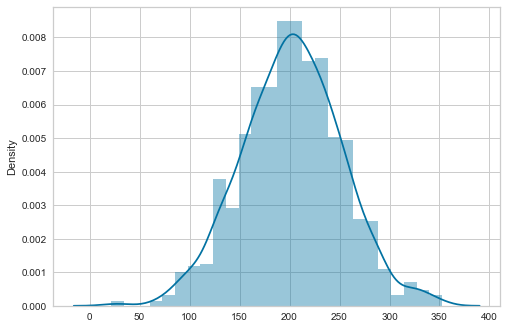

In [714]:
sns.distplot(x)

<h2> Residual Analysis

In [718]:
residual= y-y_pred

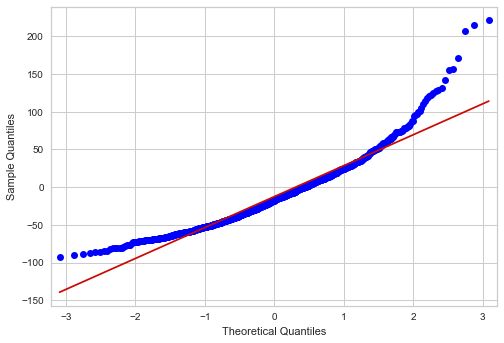

In [719]:
sm.qqplot(residual, line ='r')
plt.show()